In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from wordcloud import WordCloud, STOPWORDS 
import re

In [ ]:
df=pd.read_csv('datasets/Reduced_Cleaned_Reviews_headphones.csv')

In [ ]:
df.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,date,price,review_text,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Five Stars Great headphones. It's just the cor...,good,five star great headphones cord short,2015,1,"['five', 'star', 'great', 'headphones', 'cord'...",14,"(0, 100]"
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Officewear Really like these headphone. Wante...,good,officewear really like headphone want somethin...,2017,1,"['officewear', 'really', 'like', 'headphone', ...",47,"(0, 100]"
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,For the money they are fine. Just hope they ho...,bad,money fine hope hold wire headphone break less...,2016,0,"['money', 'fine', 'hope', 'hold', 'wire', 'hea...",29,"(0, 100]"
3,3,True,A36BC0YFDBNB5X,4126895493,bigboy,1474675200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Three Stars Very good,good,three star good,2016,1,"['three', 'star', 'good']",4,"(0, 100]"
4,1,True,A212PQ0HQPNNWM,4126895493,Kelly Hales,1468713600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Currently returning this product because the s...,bad,currently return product sound not come curren...,2016,0,"['currently', 'return', 'product', 'sound', 'n...",48,"(0, 100]"


### Total reviews per rating

In [ ]:
df_count=df.groupby('Rating').count()['reviewerID']
df_count

Rating
1    1025
2     854
3    1296
4    2709
5    9116
Name: reviewerID, dtype: int64

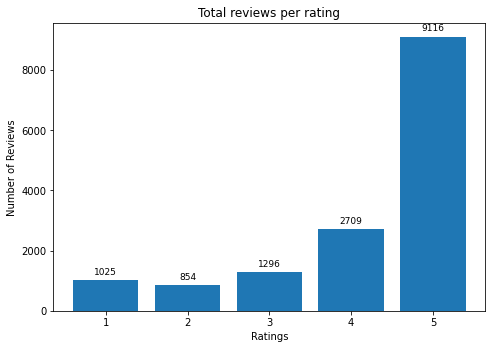

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ratings = list(df_count.index)
count = list(df_count)
ax.bar(ratings,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.title('Total reviews per rating')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()

### Top 20 reviewed brands

In [ ]:
df_brand=df.groupby('brand').count()['reviewerID'].sort_values(ascending=False)
df_brand[:20]

brand
Sennheiser         2530
Sony               2340
Koss               1955
Belkin             1955
Panasonic          1866
Audio-Technica      862
turelar             644
Zalman              580
Maxell              461
Etre Jeune          387
CAD Audio           335
JLAB                218
Hosa                196
EldHus              131
Coby                 94
Yamaha               58
Cyber Acoustics      56
Ultrasone            50
HeadGear             49
Arista               44
Name: reviewerID, dtype: int64

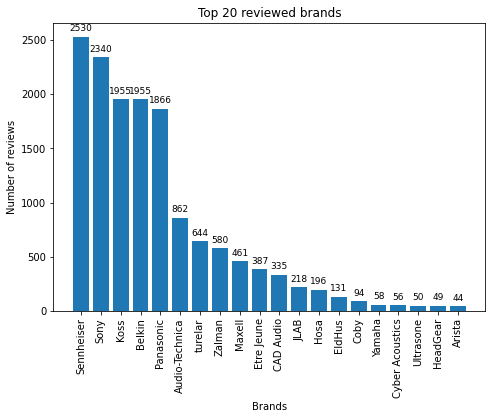

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_brand.index[:20])
count = list(df_brand)[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
df_mean_rating = df.groupby('brand').agg({'Rating':'mean'}).sort_values(by=['Rating'],ascending=False)

### Top 20 reviewed products

In [ ]:
df_product=df.groupby('title').count()['reviewerID'].sort_values(ascending=False)

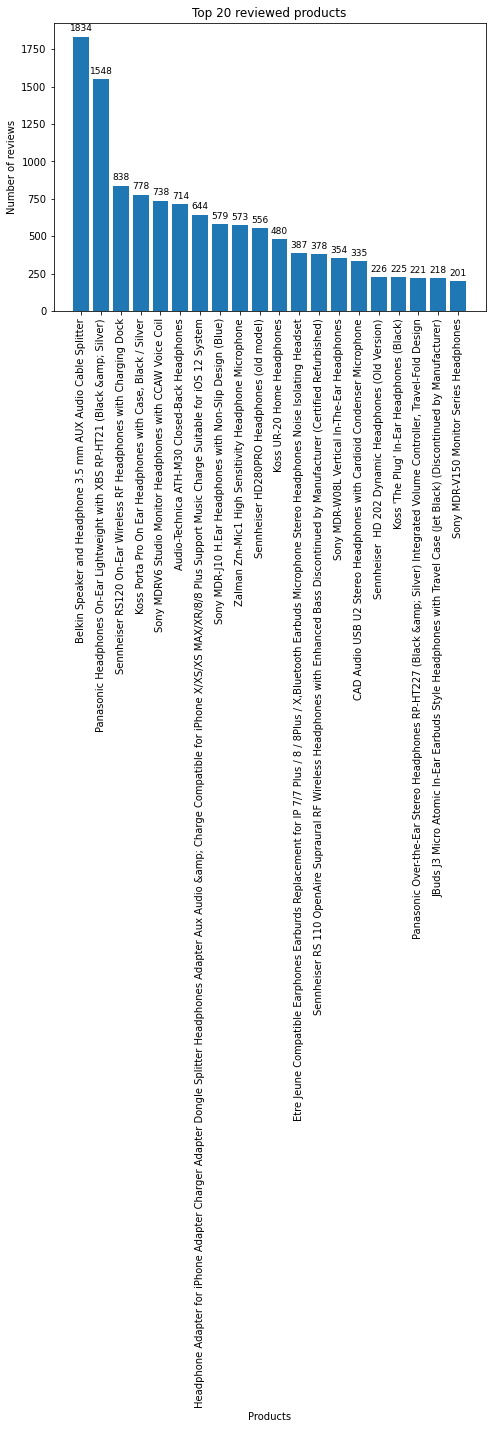

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
products = list(df_product.index[:20])
count = list(df_product)[:20]
ax.bar(products,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed products')
plt.xlabel('Products')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'rating_class', 'clean_text', 'year',
       'rating_class_num', 'token', 'review_length', 'review_length_bin'],
      dtype='object')

### Disitribution of Categories

In [ ]:
df['category'] = df['category'].apply(eval)

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
df_category = pd.DataFrame(to_1D(df['category']).value_counts(),columns=['count']).reset_index()
df_category.rename({'index': 'category'},axis=1,inplace=True)
df_category['category'] = df_category['category'].map(lambda x: re.sub(r'&amp;', '&', x))
df_category.loc[df_category['count'] < 1000, 'category'] = 'Others'

others_count=df_category[df_category['category'] == 'Others']['count'].sum()
df_category.drop(df_category[df_category['category'] =='Others'].index,inplace=True)
df_category.loc[len(df_category.index)] = ['Others',others_count]
df_category

,category,count
0,Electronics,15000
1,Headphones,10521
2,Over-Ear Headphones,4833
3,Audio & Video Accessories,3392
4,Headphone Accessories,3025
5,On-Ear Headphones,2852
6,Adapters,2643
7,Accessories & Supplies,2455
8,Earbud Headphones,1494
9,Audio & Video Accessories,1016


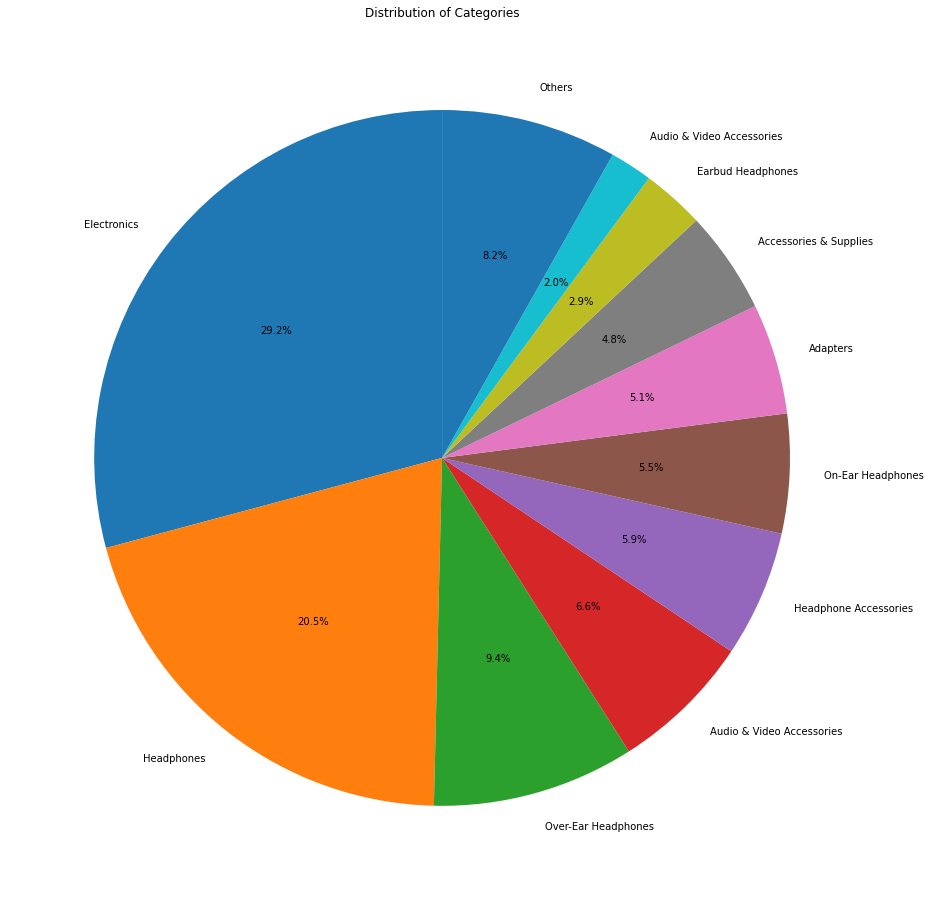

In [ ]:
category = df_category['category']
sizes = df_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(100, 16))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Distribution of Categories')
plt.show()

In [ ]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by='brand',ascending=False)
df_brand_class[:20]

Rating
brand      rating_class        
turelar    good            2819
           bad               67
Zalman     good            2095
           bad              148
Yamaha     good             234
           bad               10
Vic Firth  good              97
           bad                4
Ultrasone  good             197
           bad               12
Tripp Lite good             104
Technics   good              61
StarTech   good              38
Stanton    good              99
           bad                4
Sony       good            9193
           bad              507
Sennheiser good           10018
           bad              508
Sangean    good               4

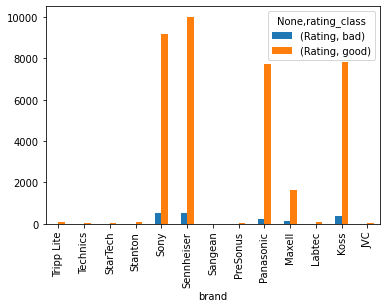

In [ ]:
df_brand_class[10:30].unstack().plot(kind='bar', stacked=False)

In [ ]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'rating_class', 'clean_text', 'year',
       'rating_class_num', 'token', 'review_length', 'review_length_bin'],
      dtype='object')

In [ ]:
word_count = df.clean_text.str.split(expand=True).stack().value_counts()

In [ ]:
df1=df.groupby(["brand"]).get_group("Sony")

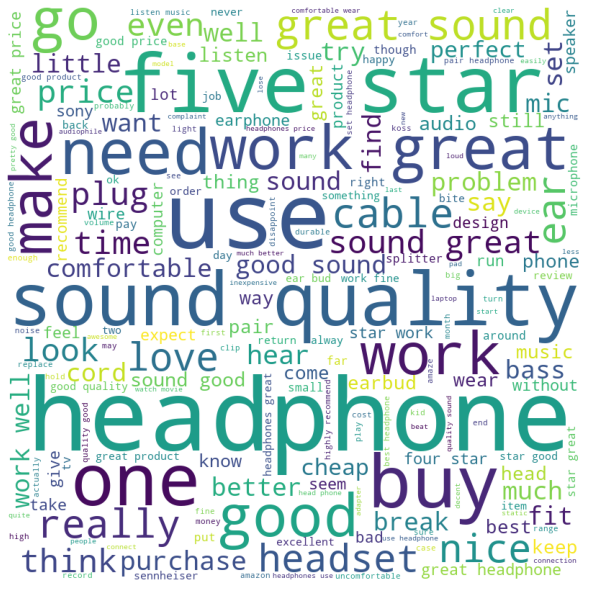

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.clean_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Distribution of main catgeories

In [ ]:
df['main_cat'] = df['main_cat'].map(lambda x: re.sub(r'&amp;', '&', x))
df_main_category = pd.DataFrame(df['main_cat'].value_counts()).reset_index()
df_main_category.columns=['category','count']
df_main_category.drop(df_main_category[df_main_category['category'] =='All Electronics'].index,inplace=True)
df_main_category

,category,count
0,Home Audio & Theater,11020
1,Musical Instruments,1969
3,Cell Phones & Accessories,644
4,Amazon Home,131
5,Camera & Photo,36
6,Computers,2


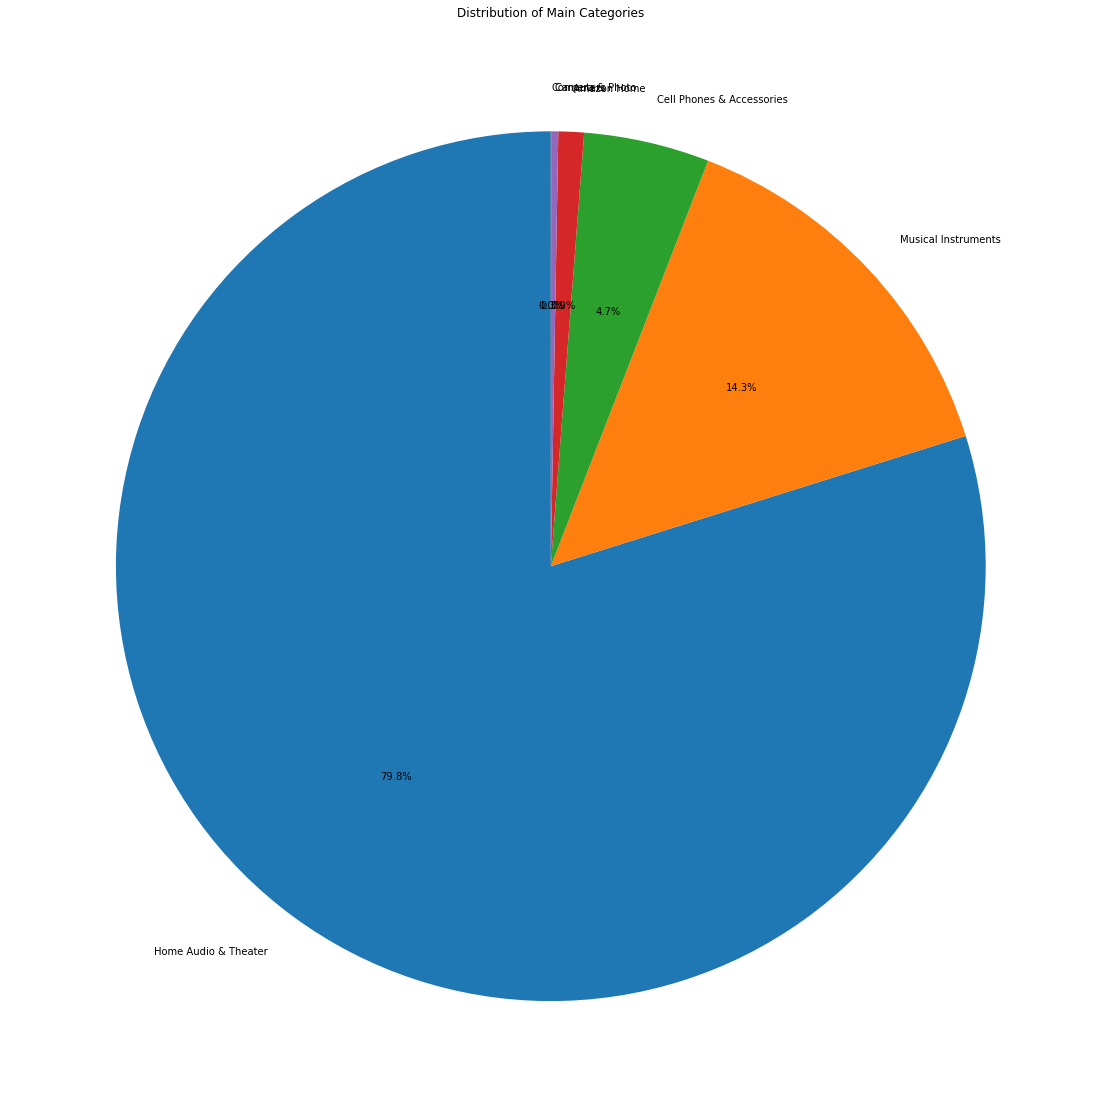

In [ ]:
category = df_main_category['category']
sizes = df_main_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(25, 20))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Distribution of Main Categories')
plt.show()

### Ratings for Top 10 reviewed brands

In [ ]:
df_rating_brand=df.loc[df['brand'].isin(df_brand[:10].index)]
df_rating_brand=pd.DataFrame(df_rating_brand.groupby(['brand', 'Rating']).size(),columns=[''])
df_rating_brand

brand          Rating      
Audio-Technica 1         17
               2         41
               3         81
               4        192
               5        531
Belkin         1        134
               2         56
               3        118
               4        273
               5       1374
Etre Jeune     1         12
               2          9
               3         26
               4         57
               5        283
Koss           1         99
               2        141
               3        183
               4        387
               5       1145
Maxell         1         69
               2         34
               3         48
               4         74
               5        236
Panasonic      1         84
               2         84
               3        175
               4        409
               5       1114
Sennheiser     1        192
               2        158
               3        235
               4        412
               5       1533
Sony           1        167
               2        170
               3        198
               4        426
               5       1379
Zalman         1         66
               2         41
               3         74
               4        122
               5        277
turelar        1         33
               2         17
               3         29
               4         93
               5        472

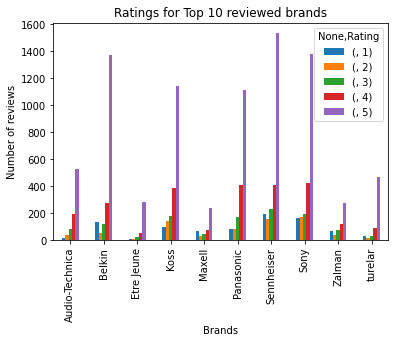

In [ ]:
#df_rating_brand.set_axis(['brand','rating'],axis=1, inplace=False).plot(kind='bar')
df_rating_brand.unstack().plot(kind='bar')
plt.title('Ratings for Top 10 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

The bar chart above gives us how the rating for different products under a brand is distributed over the ratings 1 to 5

In [ ]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by=['brand','rating_class'],ascending=False)
df_brand_class

Rating
brand          rating_class        
turelar        good            2819
               bad               67
Zalman         good            2095
               bad              148
Yamaha         good             234
...                             ...
Audio-Technica good            3666
               bad               99
Arista         good             166
               bad               10
ART            good               5

[61 rows x 1 columns]

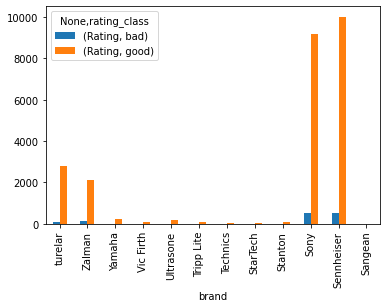

In [ ]:
df_brand_class[0:20].unstack().plot(kind='bar', stacked=False)

In [ ]:
df['main_cat'].unique()

array(['Musical Instruments', 'Home Audio & Theater', 'Computers',
       'All Electronics', 'Camera & Photo', 'Amazon Home',
       'Cell Phones & Accessories'], dtype=object)